```
#############################################
##                                         ##
##  Natural Language Processing in Python  ##
##                                         ##
#############################################

§2 Sentiment Analysis in Python

§2.3 More on numeric vectors - transforming Tweets
```

# Capturing a token pattern

## What are stop words, and how to find them?

* **Stop words** mean words that occur too frequently and not considered informative.

* E.g., *lists of stop words in most condition:*

    `{'the', 'a', 'an', 'and', 'but', 'for', 'on', 'in', 'at' ...}`

* E.g., *context matters:*

    `{'movie', 'movies', 'film', 'films', 'cinema'}`


## Why using stop words with word clouds?

* Word cloud, not removing stop words:

    ![Word cloud not removing stop words](ref1.%20Word%20cloud%20not%20removing%20stop%20words.jpg)

* Word cloud with stop words removed:

    ![Word cloud with stop words removed](ref2.%20Word%20cloud%20with%20stop%20words%20removed.jpg)

## Code of remove stop words from word clouds:

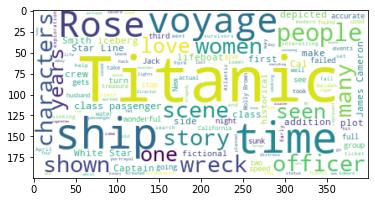

In [1]:
# Import libraries
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

titanic_review = open('ref3. A movie review of Titanic.txt').read()

# Define the stopwords list
my_stopwords = set(STOPWORDS)
my_stopwords.update(["movie", "movies", "film", "films", "watch", "br"])

# Generate and show the word cloud
my_cloud = WordCloud(background_color='white',
                     stopwords=my_stopwords).generate(titanic_review)
plt.imshow(my_cloud, interpolation='bilinear')

## Code of stop words with BOW:

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

movies = pd.read_csv('ref4. IMDB movie reviews.csv')
movies = movies[['review', 'label']]

# Define the set of stop words
my_stop_words = ENGLISH_STOP_WORDS.union(
    ['film', 'movie', 'cinema', 'theatre'])

vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(movies.review)
X = vect.transform(movies.review)

X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   00  000  000s  007  0080  0083  0093638  00am  00pm  00s  ...  zukovic  \
0   0    0     0    0     0     0        0     0     0    0  ...        0   
1   0    0     0    0     0     0        0     0     0    0  ...        0   
2   0    0     0    0     0     0        0     0     0    0  ...        0   
3   0    0     0    0     0     0        0     0     0    0  ...        0   
4   0    0     0    0     0     0        0     0     0    0  ...        0   

   zulu  zuniga  zvyagvatsev  zwick  zx81  zy  zzzzzzzzzzzz  zzzzzzzzzzzzz  â½  
0     0       0            0      0     0   0             0              0   0  
1     0       0            0      0     0   0             0              0   0  
2     0       0            0      0     0   0             0              0   0  
3     0       0            0      0     0   0             0              0   0  
4     0       0            0      0     0   0             0              0   0  

[5 rows x 45529 columns]


## Practice exercises of stop words:

$\blacktriangleright$ **Package pre-loading:**

In [3]:
from matplotlib import pyplot as plt

$\blacktriangleright$ **Data pre-loading:**

In [4]:
text_tweet = open(
    'ref5. Messages of 1000 customers shared on Twitter.txt').read()

$\blacktriangleright$ **Word cloud of tweets:**

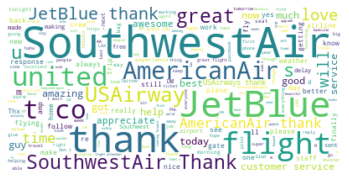

In [5]:
# Import the word cloud function
from wordcloud import WordCloud

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white').generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis("off")

# Don't forget to show the final image
plt.show()

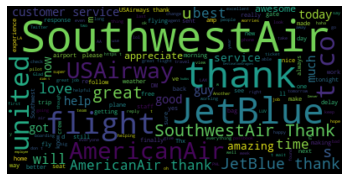

In [6]:
# Import the word cloud function and stop words list
from wordcloud import WordCloud, STOPWORDS

# Define and update the list of stopwords
my_stop_words = STOPWORDS.union(['airline', 'airplane'])

# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis("off")
# Don't forget to show the final image
plt.show()

$\blacktriangleright$ **Package re-pre-loading:**

In [7]:
import pandas as pd

$\blacktriangleright$ **Data re-pre-loading:**

In [39]:
tweets_all = pd.read_csv('ref6. Twitter US airline sentiment.csv')

tweets_2_column = tweets_all[['airline_sentiment', 'text']]

tweets = tweets_2_column.iloc[:1001].copy()

$\blacktriangleright$ **Airline sentiment with stop words:**

In [9]:
# Import the stop words
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])

# Build and fit the vectorizer
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(tweets.text)

# Create the bow representation
X_review = vect.transform(tweets.text)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   00  000  000114  000419  0011  0016  0162424965446  0185  0530  0736  ...  \
0   0    0       0       0     0     0              0     0     0     0  ...   
1   0    0       0       0     0     0              0     0     0     0  ...   
2   0    0       0       0     0     0              0     0     0     0  ...   
3   0    0       0       0     0     0              0     0     0     0  ...   
4   0    0       0       0     0     0              0     0     0     0  ...   

   yummy  yvr  zambia  zcbjyo6lsn  zcc82u  zero  zfqmpgxvs6  zone  zsuztnaijq  \
0      0    0       0           0       0     0           0     0           0   
1      0    0       0           0       0     0           0     0           0   
2      0    0       0           0       0     0           0     0           0   
3      0    0       0           0       0     0           0     0           0   
4      0    0       0           0       0     0           0     0           0   

   zv2pt6trk9  
0           0  


$\blacktriangleright$ **Data re-pre-loading:**

In [44]:
tweets_3_column = tweets_all[['airline_sentiment', 'text',
                              'negative_reason']].dropna()

tweets = tweets_3_column.iloc[:2001].copy()

$\blacktriangleright$ **Multiple text columns:**

In [45]:
# Import the vectorizer and default English stop words list
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(
    ['airline', 'airlines', '@', 'am', 'pm'])

# Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=my_stop_words)
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
vect1.fit(tweets.text)
vect2.fit(tweets.negative_reason)

# Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names()[-15:])
print(vect2.get_feature_names())

['yxe', 'yyc', 'yyj', 'yyz', 'zambia', 'zcbjyo6lsn', 'zcc82u', 'zero', 'zfqmpgxvs6', 'zhxok07aqa', 'zone', 'zones', 'zrh', 'zurich', 'zv6cfpohl5']
['attendant', 'bad', 'booking', 'cancelled', 'complaints', 'customer', 'damaged', 'flight', 'issue', 'late', 'longlines', 'lost', 'luggage', 'problems', 'service', 'tell']
